# Optical Character Recognition with PyTesseract & EASY OCR

- In this lesson we'll implement OCR on a few images using PyTesseract
- Using Easy OCR lib

![](https://miro.medium.com/max/1400/1*X7RfC5wOZ-Gsoo95Ez1FvQ.png) 
Source - https://medium.com/@balaajip/optical-character-recognition-99aba2dad314

---
### Imports and Helper-functions

Install Tesseract:

https://ub-mannheim.github.io/Tesseract_Dokumentation/Tesseract_Doku_Windows.html

On Linux:<br>
sudo apt install tesseract-ocr

In [2]:
%pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import cv2

import pytesseract

In [6]:
pytesseract.pytesseract.tesseract_cmd = (
    r'D:/Programme/tesseract_OCR'
)

In [7]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [8]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = "../../res/img/course_img/LP.jpg"
IMG_PATH   

'../../res/img/course_img/LP.jpg'

---
### Loading data

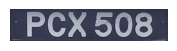

(117, 576, 3)

In [9]:
img = cv2.imread(IMG_PATH)
imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img.shape

---
### Apply OCR

In [13]:
output_txt = pytesseract.image_to_string(img)

print(f"PyTesseract Extracted: {output_txt}")

PermissionError: [WinError 5] Zugriff verweigert

It can be helpful to binarize the image

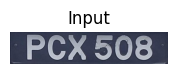

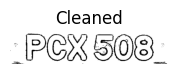

PermissionError: [WinError 5] Zugriff verweigert

In [15]:
from skimage.filters import threshold_local

imshow(img, "Input")

# We get the Value component from the HSV color space 
# then we apply adaptive thresholdingto 
V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation 
thresh = (V > T).astype("uint8") * 255
imshow(thresh, "Cleaned")

output_txt = pytesseract.image_to_string(thresh)
print(f"PyTesseract Extracted: {output_txt}")

---
### Easy OCR

In [1]:
%pip install easyocr

  Using cached easyocr-1.7.1-py3-none-any.whl.metadata (11 kB)
  Using cached torch-2.2.1-cp312-cp312-win_amd64.whl.metadata (26 kB)
  Using cached torchvision-0.17.1-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
Using cached easyocr-1.7.1-py3-none-any.whl (2.9 MB)
Using cached torchvision-0.17.1-cp312-cp312-win_amd64.whl (1.2 MB)
Using cached torch-2.2.1-cp312-cp312-win_amd64.whl (198.5 MB)
Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl (38.5 MB)
Using cached filelock-3.13.1-py3-none-any.whl (11 kB)
Using cached fsspec-2024.2.0-py3-none-any.whl (170 kB)
Using cached Jinja2-3.1.3-py3-none-any.whl (133 kB)
Using ca

In [2]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import cv2

import pytesseract

from easyocr import Reader
import time

In [3]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [4]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = "../../res/img/course_img/LP.jpg"
IMG_PATH   

'../../res/img/course_img/LP.jpg'

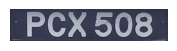

(117, 576, 3)

In [5]:
img = cv2.imread(IMG_PATH)
imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img.shape

In [7]:
# OCR the input image using EasyOCR
print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = False)

ts = time.time()
results = reader.readtext(img)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')

Using CPU. Note: This module is much faster with a GPU.


Detecting and OCR'ing text from input image...
Completed in 0.2520914077758789 seconds


display result

 Probability of Text: 63.772% OCR'd Text: PCX 508


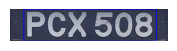

In [8]:
copy = img.copy()

all_text = []

# iterate over our extracted text 
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(copy, tl, br, (255, 0, 0), 2)
    cv2.putText(copy, text, (tl[0], tl[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# show the output image
imshow(copy)

---